<a href="https://colab.research.google.com/github/Alexandro23/Simulaci-n-2/blob/main/Simulaci%C3%B3n_Simpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### ALEJALDRE GRANADOS MARLON ALEXANDRO

# **SIMULACIÓN**




## INVENTORY SYSTEM DISCRETE EVENT SIMULATION IN PYTHON (PROCESS INTERACTION)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
0.16 sold 2 
0.53 sold 4 
0.69 sold 2 
0.88 sold 3 
0.88 placed order for11
1.00 sold 3 
1.01 sold 1 
1.11 sold 3 
1.44 sold 3 
1.61 sold 2 
1.97 sold 1 
1.99 sold 4 
2.08 sold  0 (put of stock)
2.38 sold  0 (put of stock)
2.79 sold  0 (put of stock)
2.883937received order,11 in inventory
3.11 sold 4 
3.11 placed order for23
3.26 sold 4 
3.28 sold 1 
3.46 sold  0 (put of stock)
4.04 sold  0 (put of stock)
4.06 sold  0 (put of stock)
4.12 sold  0 (put of stock)
4.39 sold  0 (put of stock)
4.56 sold  0 (put of stock)
4.63 sold  0 (put of stock)
4.82 sold  0 (put of stock)
4.92 sold  0 (put of stock)


Text(0, 0.5, 'Inventory level')

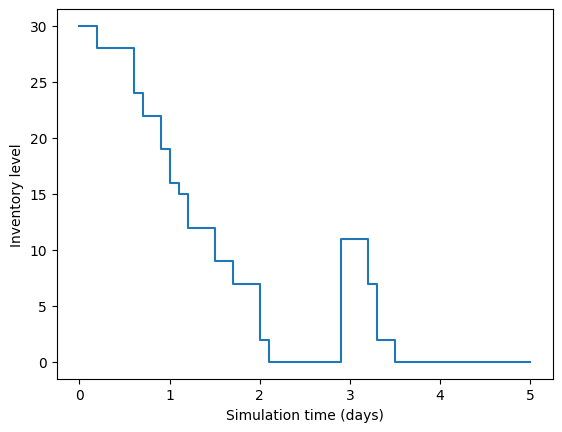

In [2]:
'''
Inventarios, Simulacion de sistemas discretos.
'''

!pip install simpy

import simpy
import numpy as np

def werehouse_run(env, order_cutoff, order_target):
  global inventory, balance, num_ordered

  inventory = order_target
  balance = 0.0
  num_ordered = 0

  while True:
    interarrival =generate_interarrival()
    yield env.timeout(interarrival)
    balance-= inventory*2*interarrival
    demand = generate_demand()
    if demand < inventory:
      balance += 100*demand
      inventory -= demand
      print('{:.2f} sold {} '.format(env.now, demand))
    else:
      balance += 100*inventory
      inventory = 0
      print('{:.2f} sold  {} (put of stock)'.format(env.now, inventory))

    if inventory < order_cutoff and num_ordered == 0:
      env.process(handle_order(env, order_target))

def handle_order(env, order_target):
  global inventory, balance, num_ordered


  num_ordered = order_target - inventory
  print('{:.2f} placed order for{}'.format(env.now, num_ordered))
  balance -= 50*num_ordered
  yield env.timeout(2.0)
  inventory += num_ordered
  num_ordered = 0
  print('{:02f}received order,{} in inventory'.format(env.now, inventory))


def generate_interarrival():
  return np.random.exponential(1./5)

def generate_demand():
  return np.random.randint(1,5)

obs_time = []
inventory_level = []

def observe(env):
  global inventory

  while True:
    obs_time.append(env.now)
    inventory_level.append(inventory)
    yield env.timeout(0.1)

np.random.seed(0)

env= simpy.Environment()
env.process(werehouse_run(env,20,30))
env.process(observe(env))


env.run(until=5.0)

import matplotlib.pyplot as plt

plt.figure()
plt.step(obs_time, inventory_level, where ='post')
plt.xlabel('Simulation time (days)')
plt.ylabel('Inventory level')



Primeramente notamos que necesitamos revisar la versión de Python que Colab esté ocupando, para después si esto es lo que no está fallando, podremos a instalar directamente en el cuaderno ```simpy```.

```python

!python --version

#out Python 3.10.12


# si esto no arregla la salida, aplicamos
!pip install python
```

# Explicación del Código

* Se instala la biblioteca "simpy" utilizando el comando !pip install simpy. Esto asegura que la biblioteca SimPy esté instalada en el entorno.

* Se importan las bibliotecas necesarias, incluyendo simpy, numpy y matplotlib.

* Se define una función llamada werehouse_run que representa la simulación de un sistema de inventario. Esta función se utiliza para simular el comportamiento de un almacén. Toma tres parámetros: env (el entorno de SimPy), order_cutoff (el punto de reposición del inventario) y order_target (el nivel objetivo del inventario).

* Se inicializan las variables globales inventory, balance y num_ordered.

* Dentro de un bucle while True, se genera un tiempo de interllegada utilizando la función generate_interarrival() y se espera ese tiempo utilizando yield env.timeout(interarrival).

* Se actualiza el saldo (balance) restando el costo de mantener el inventario durante el tiempo de interllegada.

* Se genera una demanda utilizando la función generate_demand().

* Si la demanda es menor que el inventario, se actualiza el saldo sumando el ingreso por la venta y se reduce el inventario en función de la demanda. Se imprime un mensaje indicando la cantidad vendida.

* Si la demanda es mayor o igual al inventario, se actualiza el saldo sumando el ingreso por la venta y se establece el inventario en cero. Se imprime un mensaje indicando que el inventario está agotado.

* Si el inventario es menor al punto de reposición (order_cutoff) y no hay ningún pedido en curso (num_ordered == 0), se inicia el proceso handle_order() para realizar un pedido.

* Se define la función handle_order que representa el proceso de manejo de un pedido. Toma el entorno (env) y el nivel objetivo del inventario (order_target) como parámetros.

* Se actualiza num_ordered para reflejar la cantidad de productos que se deben pedir.

* Se actualiza el saldo restando el costo de realizar el pedido.

* Se espera un tiempo de 2.0 unidades utilizando yield env.timeout(2.0) para simular el tiempo que lleva recibir el pedido.

* Se actualiza el inventario agregando la cantidad pedida (num_ordered).

* Se establece num_ordered en cero para indicar que no hay pedidos en curso.

* Se define la función generate_interarrival() que devuelve un tiempo de interllegada generado de manera exponencial utilizando la biblioteca numpy.

* Se define la función generate_demand() que genera una demanda aleatoria entre 1 y 5 utilizando la biblioteca numpy.

* Se inicializan las listas obs_time y inventory_level para almacenar los datos de observación del tiempo y el nivel de inventario.

* Se define la función observe que se utiliza para observar y registrar los datos del inventario durante la simulación.

* Dentro de un bucle while True, se agrega el tiempo actual (env.now) a la lista obs_time y se agrega el nivel de inventario actual a la lista inventory_level.


* Se espera un tiempo de 0.1 unidades utilizando yield env.timeout(0.1) para establecer el intervalo de observación.

* Se establece la semilla aleatoria utilizando np.random.seed(0) para asegurar la reproducibilidad de los resultados.

* Se crea un entorno de SimPy utilizando env = simpy.Environment().

* Se inicia el proceso werehouse_run(env, 20, 30) para simular el sistema de inventario. Los valores 20 y 30 se utilizan como el punto de reposición (order_cutoff) y el nivel objetivo del inventario (order_target), respectivamente.

* Se inicia el proceso observe(env) para observar y registrar los datos del inventario durante la simulación.

* Se ejecuta la simulación utilizando env.run(until=5.0), lo que indica que la simulación se ejecutará hasta que el tiempo de simulación alcance 5.0 unidades.

* Se importa la biblioteca matplotlib.pyplot como plt para generar una visualización gráfica de los resultados.

* Se crea una figura utilizando plt.figure().

* Se traza un gráfico de pasos utilizando plt.step(obs_time, inventory_level, where='post'), donde obs_time es el tiempo de observación y inventory_level es el nivel de inventario registrado.

* Se añaden etiquetas de los ejes utilizando plt.xlabel() y plt.ylabel() para especificar los títulos de los ejes X e Y, respectivamente.

* Se muestra el gráfico utilizando plt.show().